In [1]:
# import sys
# sys.path.append('../')
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

experiments = run.run()


Initial Conditions (config.py) :  {'reserve': 1000, 'pbar': 1, 'realized_price': 0, 'spot_price': 1, 'kappa': 0, 'supply': 2000.0, 'alpha': [0.5], 'alpha_bar': [0.5], 'supply_0': 20, 'supply_1': 30, 'supply_free': 2000.0, 'attestations': 40, 'attestations_0': 20, 'attestations_1': 20, 'invariant_V': 4000.0, 'invariant_I': 2000.0, 'agents':    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
0   0                     0                     0             50   
1   1                     0                     0             50   
2   2                     0                     0             50   
3   3                     0                     0             50   
4   4                     0                     0             50   

   agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
0               3               2                 45                  0.3   
1               3               2                 45                  0.4   
2               3

C:\Users\mbarl\Projects\ICF_Internal\src\sim\run.py:78: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_df = df[df.simulation == config_id['simulation_id']][df.run == config_id['run_id'] + 1]
C:\Users\mbarl\Projects\ICF_Internal\src\sim\run.py:78: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_df = df[df.simulation == config_id['simulation_id']][df.run == config_id['run_id'] + 1]
C:\Users\mbarl\Projects\ICF_Internal\src\sim\run.py:78: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_df = df[df.simulation == config_id['simulation_id']][df.run == config_id['run_id'] + 1]
C:\Users\mbarl\Projects\ICF_Internal\src\sim\run.py:78: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_df = df[df.simulation == config_id['simulation_id']][df.run == config_id['run_id'] + 1]


In [2]:
from src.sim import run
experiments = run.run()
#try:
#    experiments = run.run()
#except error:
#    print('oops error')

config_ids =  [{'M': {'starting_kappa': 2, 'starting_alpha': 0.5, 'money_raised': 1000, 'C': 2000, 'f': 0.03, 'm': 0.15, 'beta': 0.9, 'dust': 1e-08, 'period': 2000, 'rules_price': 'martin', 'E': 0.2}, 'simulation_id': 0, 'run_id': 0}, {'M': {'starting_kappa': 2, 'starting_alpha': 0.5, 'money_raised': 1000, 'C': 2000, 'f': 0.03, 'm': 0.15, 'beta': 0.9, 'dust': 1e-08, 'period': 2000, 'rules_price': 'martin', 'E': 0.2}, 'simulation_id': 0, 'run_id': 1}, {'M': {'starting_kappa': 2, 'starting_alpha': 0.5, 'money_raised': 1000, 'C': 2000, 'f': 0.03, 'm': 0.15, 'beta': 0.9, 'dust': 1e-08, 'period': 2000, 'rules_price': 'step', 'E': 0.2}, 'simulation_id': 1, 'run_id': 0}, {'M': {'starting_kappa': 2, 'starting_alpha': 0.5, 'money_raised': 1000, 'C': 2000, 'f': 0.03, 'm': 0.15, 'beta': 0.9, 'dust': 1e-08, 'period': 2000, 'rules_price': 'step', 'E': 0.2}, 'simulation_id': 1, 'run_id': 1}]


C:\Users\mbarl\Projects\ICF_Internal\src\sim\run.py:78: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_df = df[df.simulation == config_id['simulation_id']][df.run == config_id['run_id'] + 1]
C:\Users\mbarl\Projects\ICF_Internal\src\sim\run.py:78: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_df = df[df.simulation == config_id['simulation_id']][df.run == config_id['run_id'] + 1]
C:\Users\mbarl\Projects\ICF_Internal\src\sim\run.py:78: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_df = df[df.simulation == config_id['simulation_id']][df.run == config_id['run_id'] + 1]
C:\Users\mbarl\Projects\ICF_Internal\src\sim\run.py:78: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_df = df[df.simulation == config_id['simulation_id']][df.run == config_id['run_id'] + 1]


In [3]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

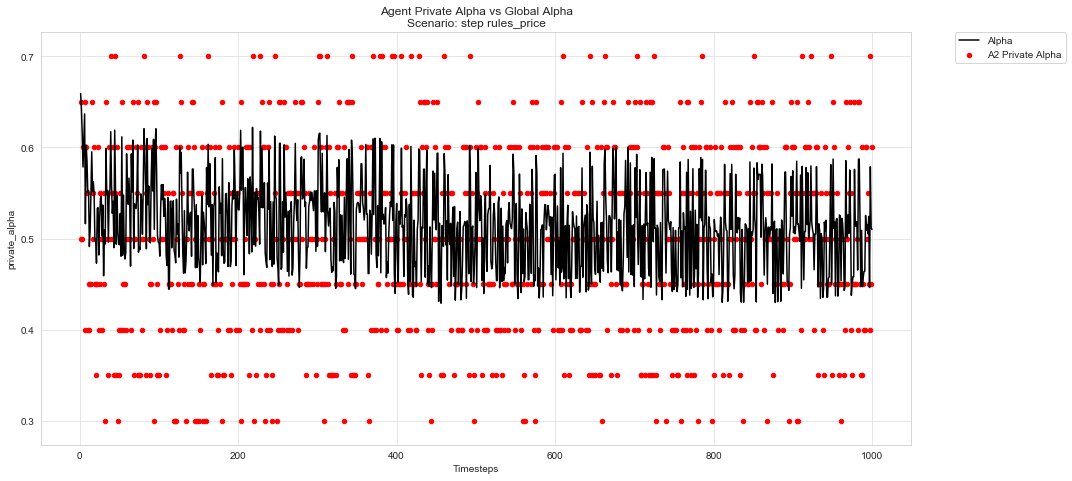

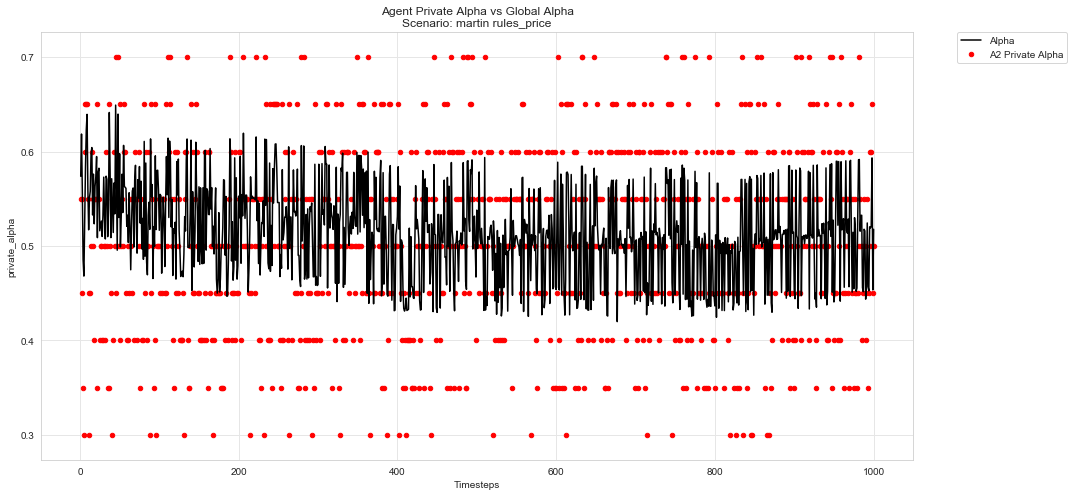

In [4]:
import sys

experiments = experiments.sort_values(by =['rules_price']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0
# config_labels = ['RULE 1,'RULE 2']

while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['rules_price']
    cc_label = experiments.iloc[cc_idx]['rules_price']
#     secondary_label = experiments.iloc[cc_idx]['string']
    sub_experiments = experiments[experiments['rules_price']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        # filter out starting point
        df = df[df.timestep > 0] 
        # FIRST RUN ONLY
#         df = df[df.run == 1]  


#         df = df.groupby('timestep').agg({'agents': ['min', 'mean', 'max']}).reset_index()
# MAKE A FOR LOOP or FUNCTION FOR ALL AGENTS
        chosen_agents = df['chosen_agent'].tolist()
        chosen_agents_private_alphas = []
        for agent in chosen_agents:
            chosen_agents_private_alphas.append(agent['agent_private_alpha'])
        
       # print(len(chosen_agents_private_alphas))
        
        df['private_alpha'] = chosen_agents_private_alphas
      #  df['agent_2_private_alpha'] = df.agents.apply(lambda x: np.array(x['chosen_agent']))
        
        df = df.groupby('timestep').mean().reset_index()
 
        # hack subtracting starting amount
#         df['alpha'] = df.alpha.diff()
        
#         df = df.groupby('timestep').agg({'supply': ['min', 'mean', 'max']}).reset_index()
    
#         df['agent_attest_1'] = np.array(df.agent_attest_1,dtype = float)
#         print(df['agent_attest_1'])
#         print(df['agent_attest_1'][10])
        plot_label = experiment['rules_price']
        ax = axs
        title = 'Agent Private Alpha vs Global Alpha' + '\n' + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Alpha Value')
        colors = ['b','orange', 'g', 'magenta', 'r', 'k' ]
#         df['agent_1_attestations_1'] = df['agent_1_attestations_1'][0]       
#         df.plot(x='timestep', y='agent_1_attestations_0', label='agent_1_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_2_attestations_0', label='agent_2_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_3_attestations_0', label='agent_3_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_4_attestations_0', label='agent_4_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_5_attestations_0', label='agent_5_attestations_0', ax=ax, legend=True)
#        df.plot(x='timestep', y='agent_1_private_alpha', label='A1 Private Alpha', ax=ax, legend=True, kind= 'scatter', color = 'red')
        df.plot(x='timestep', y='private_alpha', label='A2 Private Alpha', ax=ax, legend=True, kind= 'scatter', color='red')
        df.plot(x='timestep', y='alpha', label='Alpha', ax=ax, legend=True, color = colors[5])
        
#         ax.fill_between(df.timestep, df[('supply','min')], df[('supply','max')], supply=0.3) 

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

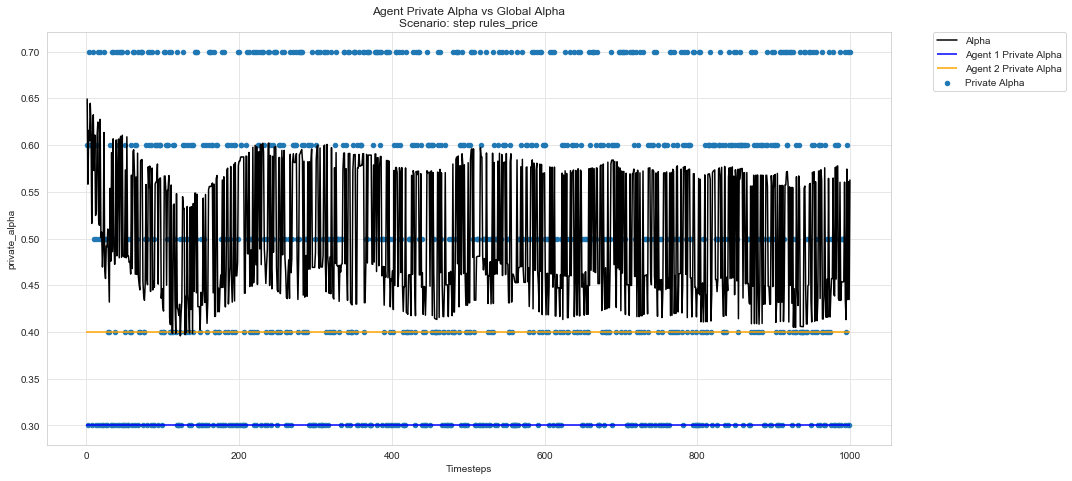

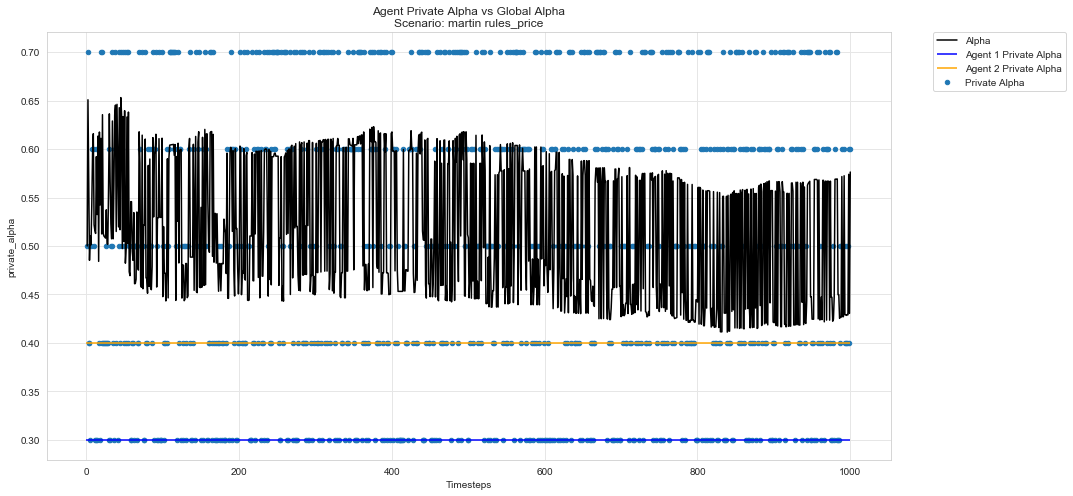

In [5]:
experiments = experiments.sort_values(by =['rules_price']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0
# config_labels = ['RULE 1,'RULE 2']


while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['rules_price']
    cc_label = experiments.iloc[cc_idx]['rules_price']
#     secondary_label = experiments.iloc[cc_idx]['string']
    sub_experiments = experiments[experiments['rules_price']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        # filter out starting point
        df = df[df.timestep > 0] 
        # FIRST RUN ONLY
        df = df[df.run == 1]  

# MAKE A FOR LOOP or FUNCTION FOR ALL AGENTS
        chosen_agents = df['chosen_agent'].tolist()
        chosen_agents_private_alphas = []
        for agent in chosen_agents:
            chosen_agents_private_alphas.append(agent['agent_private_alpha'])
        
        df['private_alpha'] = chosen_agents_private_alphas
            
        df['agent_1_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][0]))
        df['agent_2_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][1]))
#         df['agent_3_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][2]))
#         df['agent_4_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][3]))
#         df['agent_5_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][4]))
# #         df['agent_1_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][0]))
# #         print( df['agent_1_attestations_1'])
#         df['agent_1_attestations_1'] = df.agent_1_attestations_1.diff()
#         df['agent_2_attestations_1'] = df.agent_2_attestations_1.diff()
#         df['agent_3_attestations_1'] = df.agent_3_attestations_1.diff()
#         df['agent_4_attestations_1'] = df.agent_4_attestations_1.diff()
#         df['agent_5_attestations_1'] = df.agent_5_attestations_1.diff()
        
        
#         df['agent_1_attestations_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][0]))
#         df['agent_2_attestations_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][1]))
#         df['agent_3_attestations_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][2]))
#         df['agent_4_attestations_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][3]))
#         df['agent_5_attestations_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][4]))
# #         df['agent_1_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][0]))
# #         print( df['agent_1_attestations_1'])
#         df['agent_1_attestations_0'] = - df.agent_1_attestations_0.diff()
#         df['agent_2_attestations_0'] = - df.agent_2_attestations_0.diff()
#         df['agent_3_attestations_0'] = - df.agent_3_attestations_0.diff()
#         df['agent_4_attestations_0'] = - df.agent_4_attestations_0.diff()
#         df['agent_5_attestations_0'] = - df.agent_5_attestations_0.diff()
        
        
        # hack subtracting starting amount
#         df['alpha'] = df.alpha.diff()
        
#         df = df.groupby('timestep').agg({'supply': ['min', 'mean', 'max']}).reset_index()
    
#         df['agent_attest_1'] = np.array(df.agent_attest_1,dtype = float)
#         print(df['agent_attest_1'])
#         print(df['agent_attest_1'][10])
        plot_label = experiment['rules_price']
        ax = axs
        title = 'Agent Private Alpha vs Global Alpha' + '\n' + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Alpha Value')
        colors = ['b','orange', 'g', 'magenta', 'r', 'k' ]
#         df['agent_1_attestations_1'] = df['agent_1_attestations_1'][0]
        
        plt.hlines(y= max(df['agent_1_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 1 Private Alpha',  color = colors[0])
        plt.hlines(y= max(df['agent_2_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 2 Private Alpha',  color = colors[1])
#         plt.hlines(y= max(df['agent_3_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 3 Private Alpha',  color = colors[2])
#         plt.hlines(y= max(df['agent_4_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 4 Private Alpha',  color = colors[3])
#         plt.hlines(y= max(df['agent_5_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 5 Private Alpha',  color = colors[4])

#         df.plot(x='timestep', y='agent_1_attestations_1', label='agent_1_attestations_1', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_2_attestations_1', label='agent_2_attestations_1', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_3_attestations_1', label='agent_3_attestations_1', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_4_attestations_1', label='agent_4_attestations_1', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_5_attestations_1', label='agent_5_attestations_1', ax=ax, legend=True)
        
#         df.plot(x='timestep', y='agent_1_attestations_0', label='agent_1_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_2_attestations_0', label='agent_2_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_3_attestations_0', label='agent_3_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_4_attestations_0', label='agent_4_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_5_attestations_0', label='agent_5_attestations_0', ax=ax, legend=True)
        df.plot(x='timestep', y='private_alpha', label='Private Alpha', ax=ax, legend=True, kind= 'scatter')
        df.plot(x='timestep', y='alpha', label='Alpha', ax=ax, legend=True, color = colors[5])

#         ax.fill_between(df.timestep, df[('supply','min')], df[('supply','max')], supply=0.3) 

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

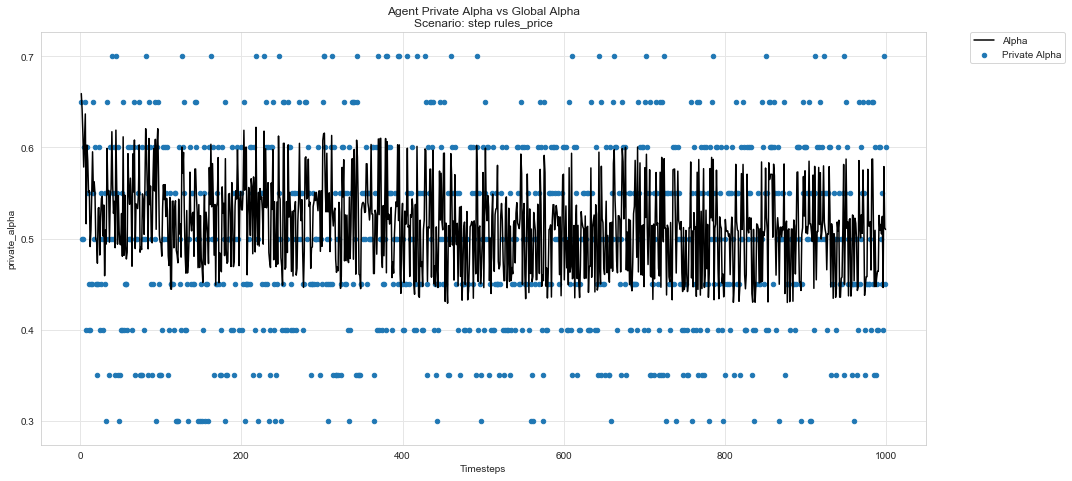

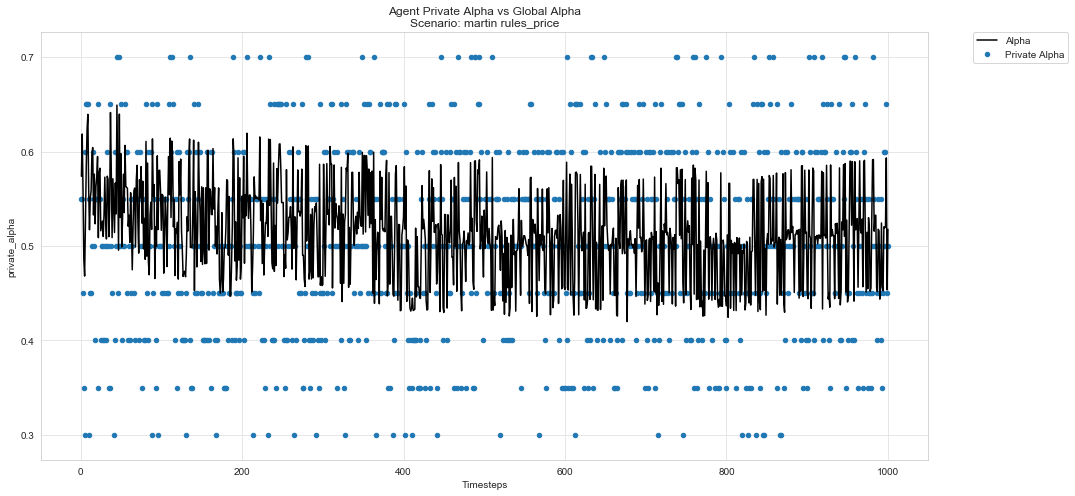

In [6]:
experiments = experiments.sort_values(by =['rules_price']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0
# config_labels = ['RULE 1,'RULE 2']


while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['rules_price']
    cc_label = experiments.iloc[cc_idx]['rules_price']
#     secondary_label = experiments.iloc[cc_idx]['string']
    sub_experiments = experiments[experiments['rules_price']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        # filter out starting point
        df = df[df.timestep > 0] 
        # FIRST RUN ONLY
#         df = df[df.run == 1]  

#         df = df.groupby('timestep').agg({'agents': ['min', 'mean', 'max']}).reset_index()
# MAKE A FOR LOOP or FUNCTION FOR ALL AGENTS
        chosen_agents = df['chosen_agent'].tolist()
        chosen_agents_private_alphas = []
        for agent in chosen_agents:
            chosen_agents_private_alphas.append(agent['agent_private_alpha'])
        
        df['private_alpha'] = chosen_agents_private_alphas
        
        df['agent_1_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][0]))
        df['agent_2_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][1]))
        
        df = df.groupby('timestep').mean().reset_index()
        
#         print(df)
#         df['agent_3_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][2]))
#         df['agent_4_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][3]))
#         df['agent_5_private_alpha'] = df.agents.apply(lambda x: np.array(x['agent_private_alpha'][4]))
# #         df['agent_1_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][0]))
# #         print( df['agent_1_attestations_1'])
#         df['agent_1_attestations_1'] = df.agent_1_attestations_1.diff()
#         df['agent_2_attestations_1'] = df.agent_2_attestations_1.diff()
#         df['agent_3_attestations_1'] = df.agent_3_attestations_1.diff()
#         df['agent_4_attestations_1'] = df.agent_4_attestations_1.diff()
#         df['agent_5_attestations_1'] = df.agent_5_attestations_1.diff()
        
     
#         df['agent_1_attestations_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][0]))
#         df['agent_2_attestations_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][1]))
#         df['agent_3_attestations_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][2]))
#         df['agent_4_attestations_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][3]))
#         df['agent_5_attestations_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_0'][4]))
# #         df['agent_1_attest_0'] = df.agents.apply(lambda x: np.array(x['agent_attestations_1'][0]))
# #         print( df['agent_1_attestations_1'])
#         df['agent_1_attestations_0'] = - df.agent_1_attestations_0.diff()
#         df['agent_2_attestations_0'] = - df.agent_2_attestations_0.diff()
#         df['agent_3_attestations_0'] = - df.agent_3_attestations_0.diff()
#         df['agent_4_attestations_0'] = - df.agent_4_attestations_0.diff()
#         df['agent_5_attestations_0'] = - df.agent_5_attestations_0.diff()
        
        
        # hack subtracting starting amount
#         df['alpha'] = df.alpha.diff()
        
#         df = df.groupby('timestep').agg({'supply': ['min', 'mean', 'max']}).reset_index()
    
#         df['agent_attest_1'] = np.array(df.agent_attest_1,dtype = float)
#         print(df['agent_attest_1'])
#         print(df['agent_attest_1'][10])
        plot_label = experiment['rules_price']
        ax = axs
        title = 'Agent Private Alpha vs Global Alpha' + '\n' + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Alpha Value')
        colors = ['b','orange', 'g', 'magenta', 'r', 'k' ]
#         df['agent_1_attestations_1'] = df['agent_1_attestations_1'][0]
        
#         plt.hlines(y= max(df['agent_1_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 1 Private Alpha',  color = colors[0])
#         plt.hlines(y= max(df['agent_2_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 2 Private Alpha',  color = colors[1])
#         plt.hlines(y= max(df['agent_3_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 3 Private Alpha',  color = colors[2])
#         plt.hlines(y= max(df['agent_4_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 4 Private Alpha',  color = colors[3])
#         plt.hlines(y= max(df['agent_5_private_alpha']), xmin=0, xmax=max(df.timestep), label = 'Agent 5 Private Alpha',  color = colors[4])

#         df.plot(x='timestep', y='agent_1_attestations_1', label='agent_1_attestations_1', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_2_attestations_1', label='agent_2_attestations_1', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_3_attestations_1', label='agent_3_attestations_1', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_4_attestations_1', label='agent_4_attestations_1', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_5_attestations_1', label='agent_5_attestations_1', ax=ax, legend=True)
        
#         df.plot(x='timestep', y='agent_1_attestations_0', label='agent_1_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_2_attestations_0', label='agent_2_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_3_attestations_0', label='agent_3_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_4_attestations_0', label='agent_4_attestations_0', ax=ax, legend=True)
#         df.plot(x='timestep', y='agent_5_attestations_0', label='agent_5_attestations_0', ax=ax, legend=True)
        df.plot(x='timestep', y='private_alpha', label='Private Alpha', ax=ax, legend=True, kind= 'scatter')
        df.plot(x='timestep', y='alpha', label='Alpha', ax=ax, legend=True, color = colors[5])

#         ax.fill_between(df.timestep, df[('supply','min')], df[('supply','max')], supply=0.3) 

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()

In [7]:
experiments.dataset[0].agents[0].agent_private_price

0    0.2
1    0.5
2    0.8
3    1.0
4    1.4
Name: agent_private_price, dtype: float64

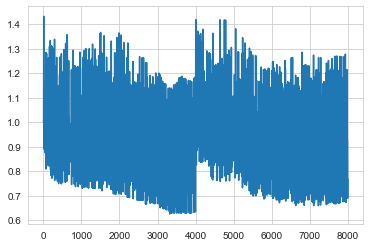

In [8]:
plt.plot(experiments.dataset[0].spot_price)

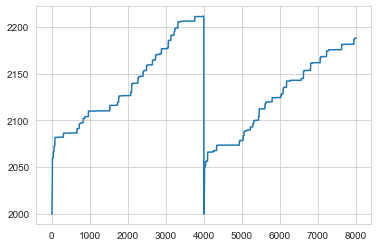

In [9]:
plt.plot(experiments.dataset[0].supply)

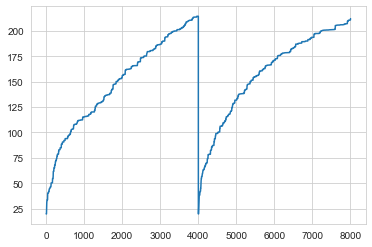

In [10]:
plt.plot(experiments.dataset[0].supply_0)

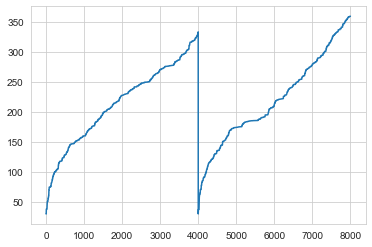

In [11]:
plt.plot(experiments.dataset[0].supply_1)

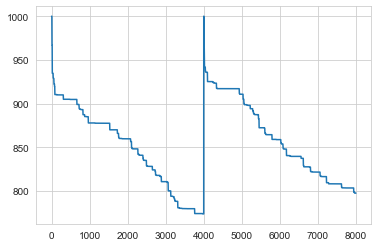

In [12]:
plt.plot(experiments.dataset[0].reserve)

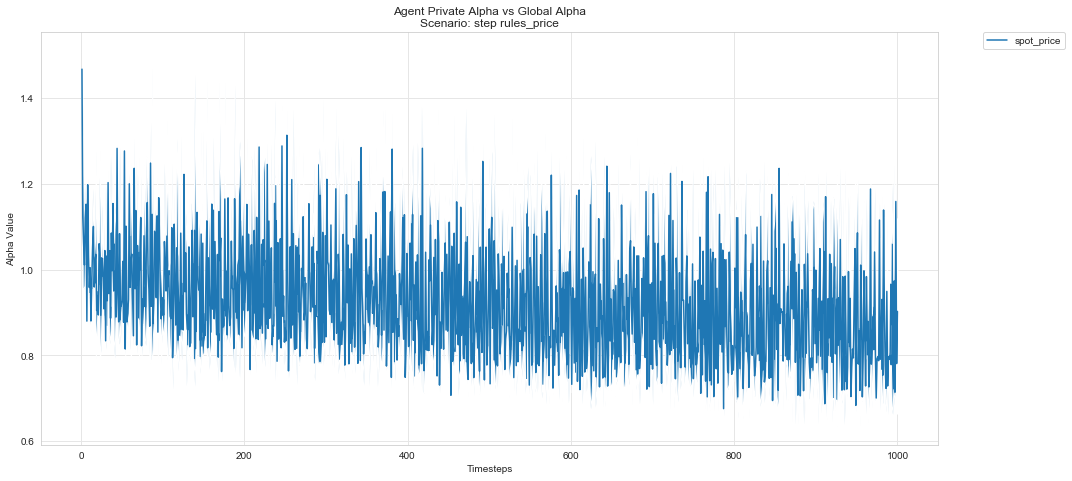

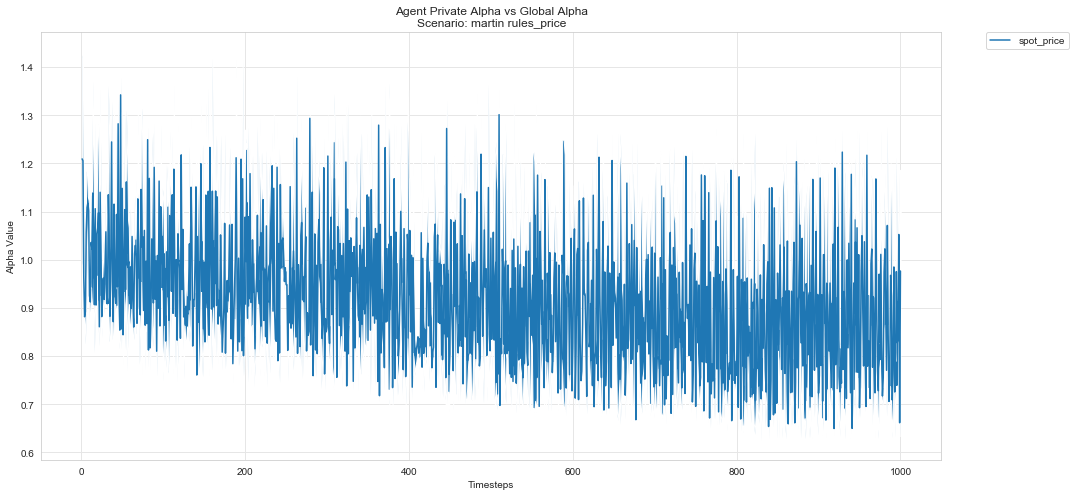

In [16]:
experiments = experiments.sort_values(by =['rules_price']).reset_index(drop=True)

cols = 1
rows = 1
cc_idx = 0
# config_labels = ['RULE 1,'RULE 2']


while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['rules_price']
    cc_label = experiments.iloc[cc_idx]['rules_price']
#     secondary_label = experiments.iloc[cc_idx]['string']
    sub_experiments = experiments[experiments['rules_price']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))
    sub_experiments.reset_index(drop=False)
    for i, experiment in sub_experiments.iterrows():
        df = experiment['dataset'].copy()
        # filter out starting point
        df = df[df.timestep > 0] 
        # FIRST RUN ONLY
#         df = df[df.run == 1]  
        
        df = df.groupby('timestep').agg({'spot_price': ['min', 'mean', 'max']}).reset_index()

        plot_label = experiment['rules_price']
        ax = axs
        title = 'Agent Private Alpha vs Global Alpha' + '\n' + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Alpha Value')
        colors = ['b','orange', 'g', 'magenta', 'r', 'k' ]

        ax.plot(df.timestep, df[('spot_price','mean')],label='spot_price') 

        ax.fill_between(df.timestep, df[('spot_price','min')], df[('spot_price','max')])#, supply=0.3) 

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()